In [2]:
import pandas as pd
import sqlite3 as sql

In [8]:
orders = pd.read_csv('./csv_data/restaurant-1-orders.csv')

In [10]:
orders.sample(5)

,number,orderdate,item,quantity,price,products_in_cart
26641,5092,14/04/2017 19:45,Garlic Naan,2,2.95,8
17784,13818,15/03/2019 17:59,Peshwari Naan,1,2.95,5
24488,7208,27/10/2017 22:20,Garlic Naan,1,2.95,6
70080,5202,23/04/2017 13:16,Chicken Balti,1,9.95,3
69670,6325,09/08/2017 18:54,Chicken Biryani,1,9.95,4


In [9]:
orders.columns = ['number', 'orderdate', 'item', 'quantity', 'price', 'products_in_cart']

In [11]:
orders['date'] = pd.to_datetime(orders['orderdate'].str[:10])

In [12]:
orders.sample(5)

,number,orderdate,item,quantity,price,products_in_cart,date
20826,10873,26/08/2018 18:32,Raitha,1,2.95,5,2018-08-26
45458,10856,25/08/2018 18:55,Tandoori Fish,1,5.95,4,2018-08-25
40556,9388,29/04/2018 16:09,Vegetable Roll,1,4.95,4,2018-04-29
11301,2238,03/04/2016 15:24,Chapati,2,1.95,7,2016-03-04
40539,9410,05/05/2018 12:27,Tandoori Chicken (1/4),1,4.95,26,2018-05-05


In [13]:
conn = sql.connect('orders2.db')
orders.to_sql('orders', conn)

In [14]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26821 sha256=6640d0ce823cd0013a8596d8d832abe64bda32d442b6451eba8e45eed1f4dae8
  Stored in directory: c:\users\joaki\appdata\local\pip\cache\wheels\ed\8f\46\a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [15]:
from pandasql import sqldf

In [17]:
pysqldf = lambda q: sqldf(q, globals())

In [19]:
pysqldf('select * from orders where price > 10')

,number,orderdate,item,quantity,price,products_in_cart,date
0,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6,2019-03-08 00:00:00.000000
1,16103,03/08/2019 18:34,Chicken Tikka Biryani,1,10.95,2,2019-03-08 00:00:00.000000
2,16102,03/08/2019 18:32,Chicken Tikka Biryani,1,10.95,4,2019-03-08 00:00:00.000000
3,16100,03/08/2019 18:00,Tandoori Mixed Grill,2,11.95,9,2019-03-08 00:00:00.000000
4,16089,02/08/2019 18:41,Korma - King Prawn,1,12.95,21,2019-02-08 00:00:00.000000
...,...,...,...,...,...,...,...
3608,2518,18/05/2016 18:53,House Red wine 75cl,2,17.95,7,2016-05-18 00:00:00.000000
3609,2503,14/05/2016 19:28,House Red wine 75cl,2,17.95,6,2016-05-14 00:00:00.000000
3610,2467,10/05/2016 13:18,House Red wine 75cl,2,17.95,9,2016-10-05 00:00:00.000000
3611,2249,07/04/2016 19:04,House white wine 75cl,1,17.95,6,2016-07-04 00:00:00.000000


In [20]:
def load_query(path):
    with open(path) as file:
        return file.read()

In [21]:
query = load_query('./queries/test.sql')
pysqldf(query)

,number,orderdate,item,quantity,price,products_in_cart,date
0,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6,2019-03-08 00:00:00.000000
1,16103,03/08/2019 18:34,Chicken Tikka Biryani,1,10.95,2,2019-03-08 00:00:00.000000
2,16102,03/08/2019 18:32,Chicken Tikka Biryani,1,10.95,4,2019-03-08 00:00:00.000000
3,16100,03/08/2019 18:00,Tandoori Mixed Grill,2,11.95,9,2019-03-08 00:00:00.000000
4,16089,02/08/2019 18:41,Korma - King Prawn,1,12.95,21,2019-02-08 00:00:00.000000
...,...,...,...,...,...,...,...
3608,2518,18/05/2016 18:53,House Red wine 75cl,2,17.95,7,2016-05-18 00:00:00.000000
3609,2503,14/05/2016 19:28,House Red wine 75cl,2,17.95,6,2016-05-14 00:00:00.000000
3610,2467,10/05/2016 13:18,House Red wine 75cl,2,17.95,9,2016-10-05 00:00:00.000000
3611,2249,07/04/2016 19:04,House white wine 75cl,1,17.95,6,2016-07-04 00:00:00.000000


### Get orders per day

In [22]:
query = load_query('./queries/daily_orders.sql')
daily_orders = pysqldf(query)

In [23]:
daily_orders.sample(5)

,date,num_orders
45,2016-03-30,3
40,2016-03-25,6
645,2018-01-12,25
985,2018-12-24,21
401,2017-05-10,4


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

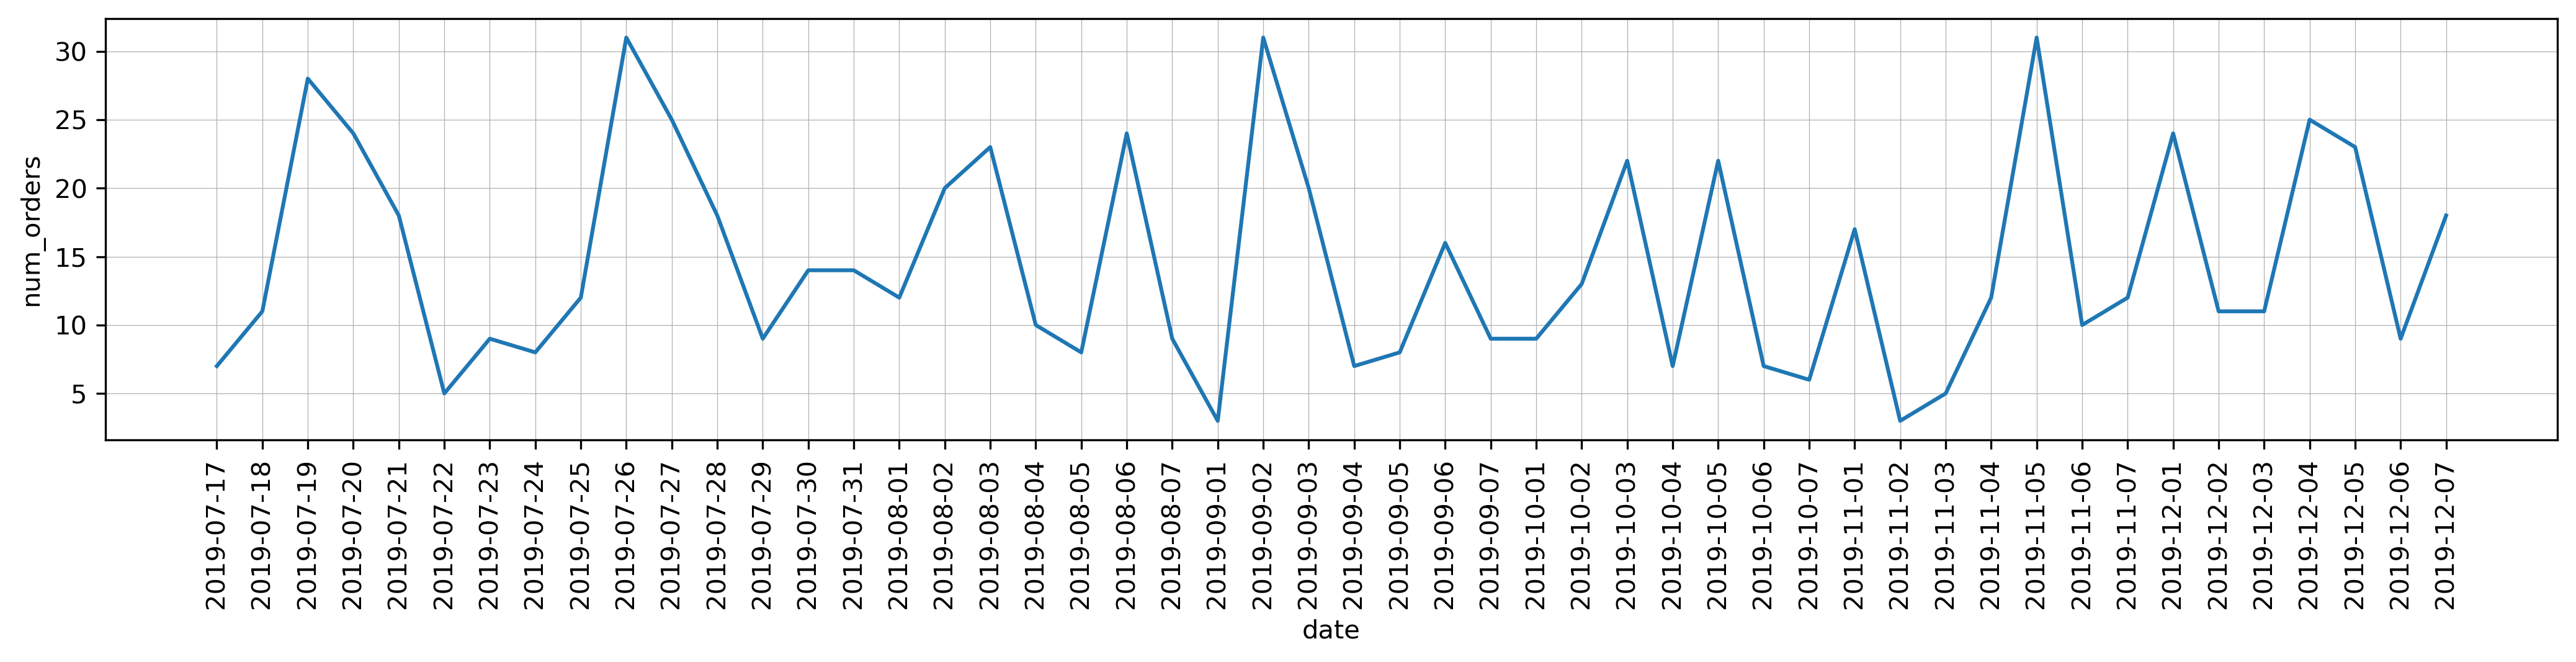

In [27]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi': 300})
fig, ax = plt.subplots()
sns.lineplot(data=daily_orders.tail(50), x='date', y='num_orders')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

### Get orders per week

In [28]:
query = load_query('./queries/weekly_orders.sql')
weekly_orders = pysqldf(query)

In [29]:
weekly_orders.sample(5)

,week,num_orders
85,2017-08-21,67
167,2019-03-18,112
57,2017-02-06,85
119,2018-04-16,93
103,2017-12-25,85


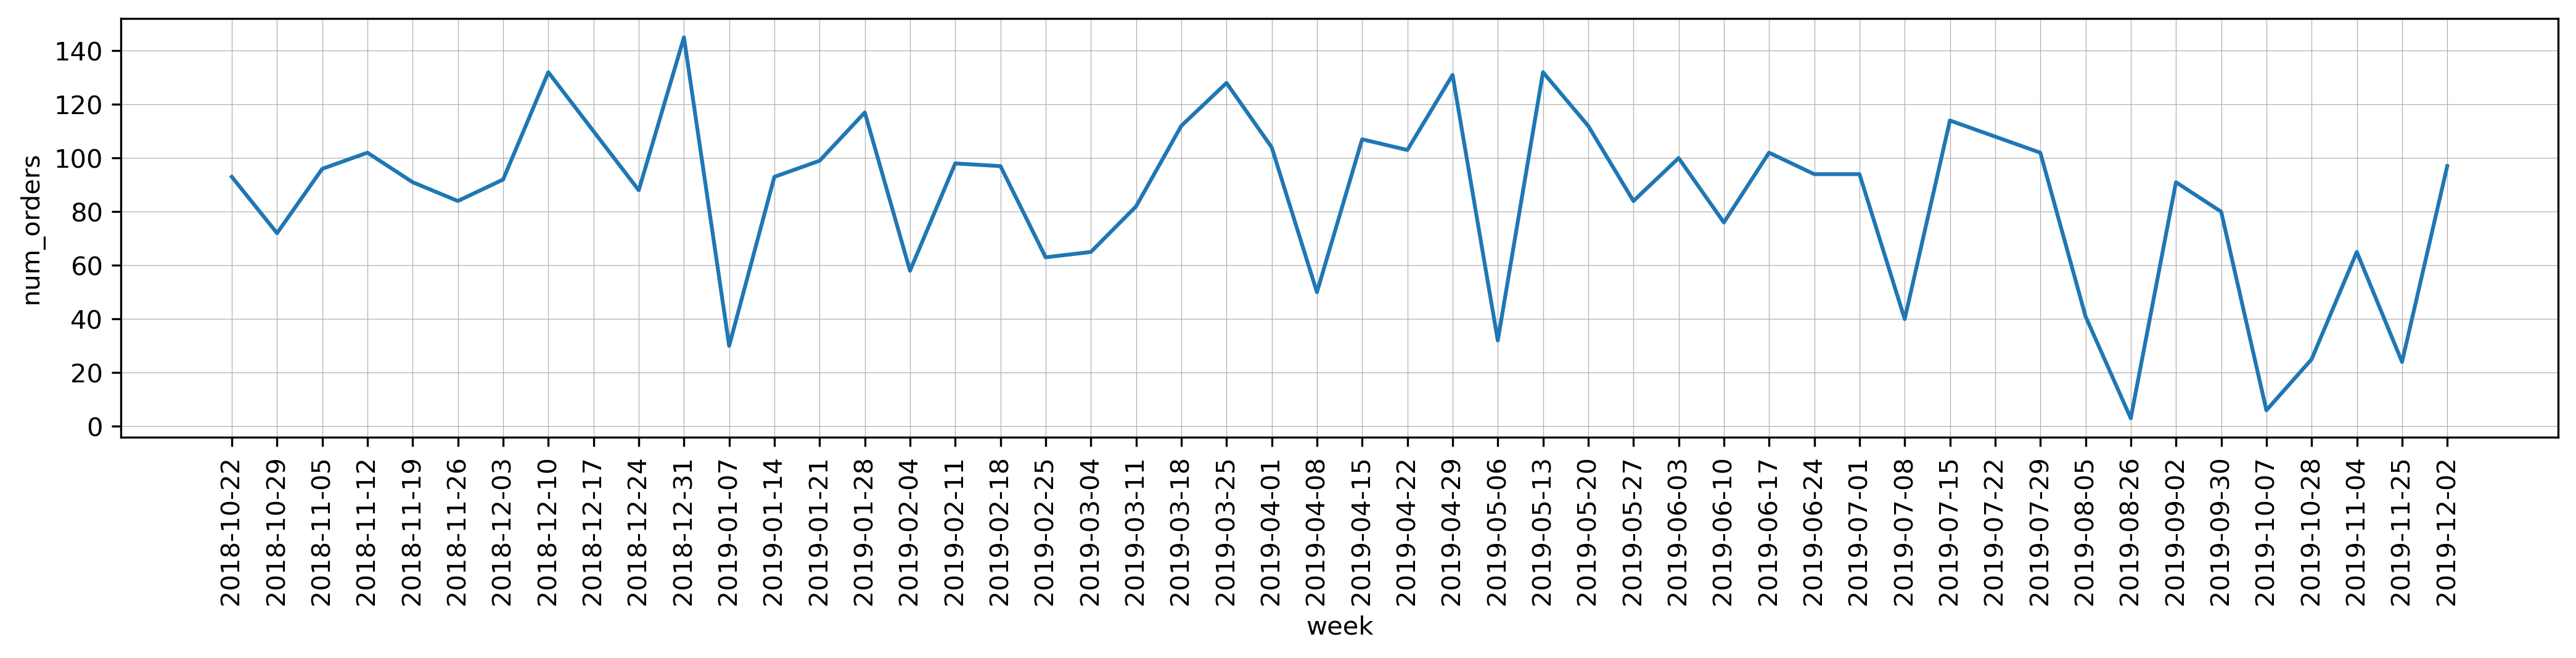

In [30]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi': 300})
fig, ax = plt.subplots()
sns.lineplot(data=weekly_orders.tail(50), x='week', y='num_orders')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

### Make prediction

In [32]:
!pip install xgboost

In [33]:
query = load_query('./queries/main.sql')
df = pysqldf(query)

In [34]:
df.to_csv('./csvs/timeseries_data.csv')

In [63]:
features = ['order_count_7_day', 'order_count_30_day']
label = 'label'

test_df = df[df['week'] >= '2019-06-01'] 
train_df = df[df['week'] < '2019-06-01'] 

In [36]:
test_df.head()

,week,order_count_7_day,order_count_30_day,label
173,2019-06-03,84,416,100
174,2019-06-10,100,428,76
175,2019-06-17,76,433,102
176,2019-06-24,102,414,94
177,2019-07-01,94,389,94


In [37]:
train_df.head()

,week,order_count_7_day,order_count_30_day,label
0,2016-01-04,0,0,40
1,2016-01-11,40,40,17
2,2016-02-01,0,57,26
3,2016-02-08,26,66,42
4,2016-02-29,0,68,15


In [64]:
X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]

In [39]:
X_train.head()

,order_count_7_day,order_count_30_day
0,0,0
1,40,40
2,0,57
3,26,66
4,0,68


In [40]:
y_train.head()

0    40
1    17
2    26
3    42
4    15
Name: label, dtype: int64

In [41]:
from xgboost import XGBRegressor

In [75]:
xg_reg = XGBRegressor(n_estimators=500, learning_rate=0.01)
xg_reg.fit(X_train,
          y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          eval_metric='mae')

[0]	validation_0-mae:68.79896	validation_1-mae:68.98370
[1]	validation_0-mae:68.12780	validation_1-mae:68.38828
[2]	validation_0-mae:67.46320	validation_1-mae:67.79865
[3]	validation_0-mae:66.80496	validation_1-mae:67.18936
[4]	validation_0-mae:66.15327	validation_1-mae:66.61114
[5]	validation_0-mae:65.50795	validation_1-mae:66.03854
[6]	validation_0-mae:64.86883	validation_1-mae:65.44685
[7]	validation_0-mae:64.23606	validation_1-mae:64.88535
[8]	validation_0-mae:63.60949	validation_1-mae:64.32928
[9]	validation_0-mae:62.98889	validation_1-mae:63.75468
[10]	validation_0-mae:62.37450	validation_1-mae:63.20939
[11]	validation_0-mae:61.76610	validation_1-mae:62.66939
[12]	validation_0-mae:61.16365	validation_1-mae:62.13464
[13]	validation_0-mae:60.56696	validation_1-mae:61.59446
[14]	validation_0-mae:59.97622	validation_1-mae:61.07187
[15]	validation_0-mae:59.39126	validation_1-mae:60.55438
[16]	validation_0-mae:58.81189	validation_1-mae:60.06925
[17]	validation_0-mae:58.23830	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
predictions = xg_reg.predict(X_test)

C:\Users\joaki\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [77]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions'] = pd.Series(predictions)

In [46]:
test_df.head()

,week,order_count_7_day,order_count_30_day,label,predictions
0,2019-06-03,84,416,100,66.390121
1,2019-06-10,100,428,76,92.323196
2,2019-06-17,76,433,102,110.203674
3,2019-06-24,102,414,94,86.136444
4,2019-07-01,94,389,94,88.356865


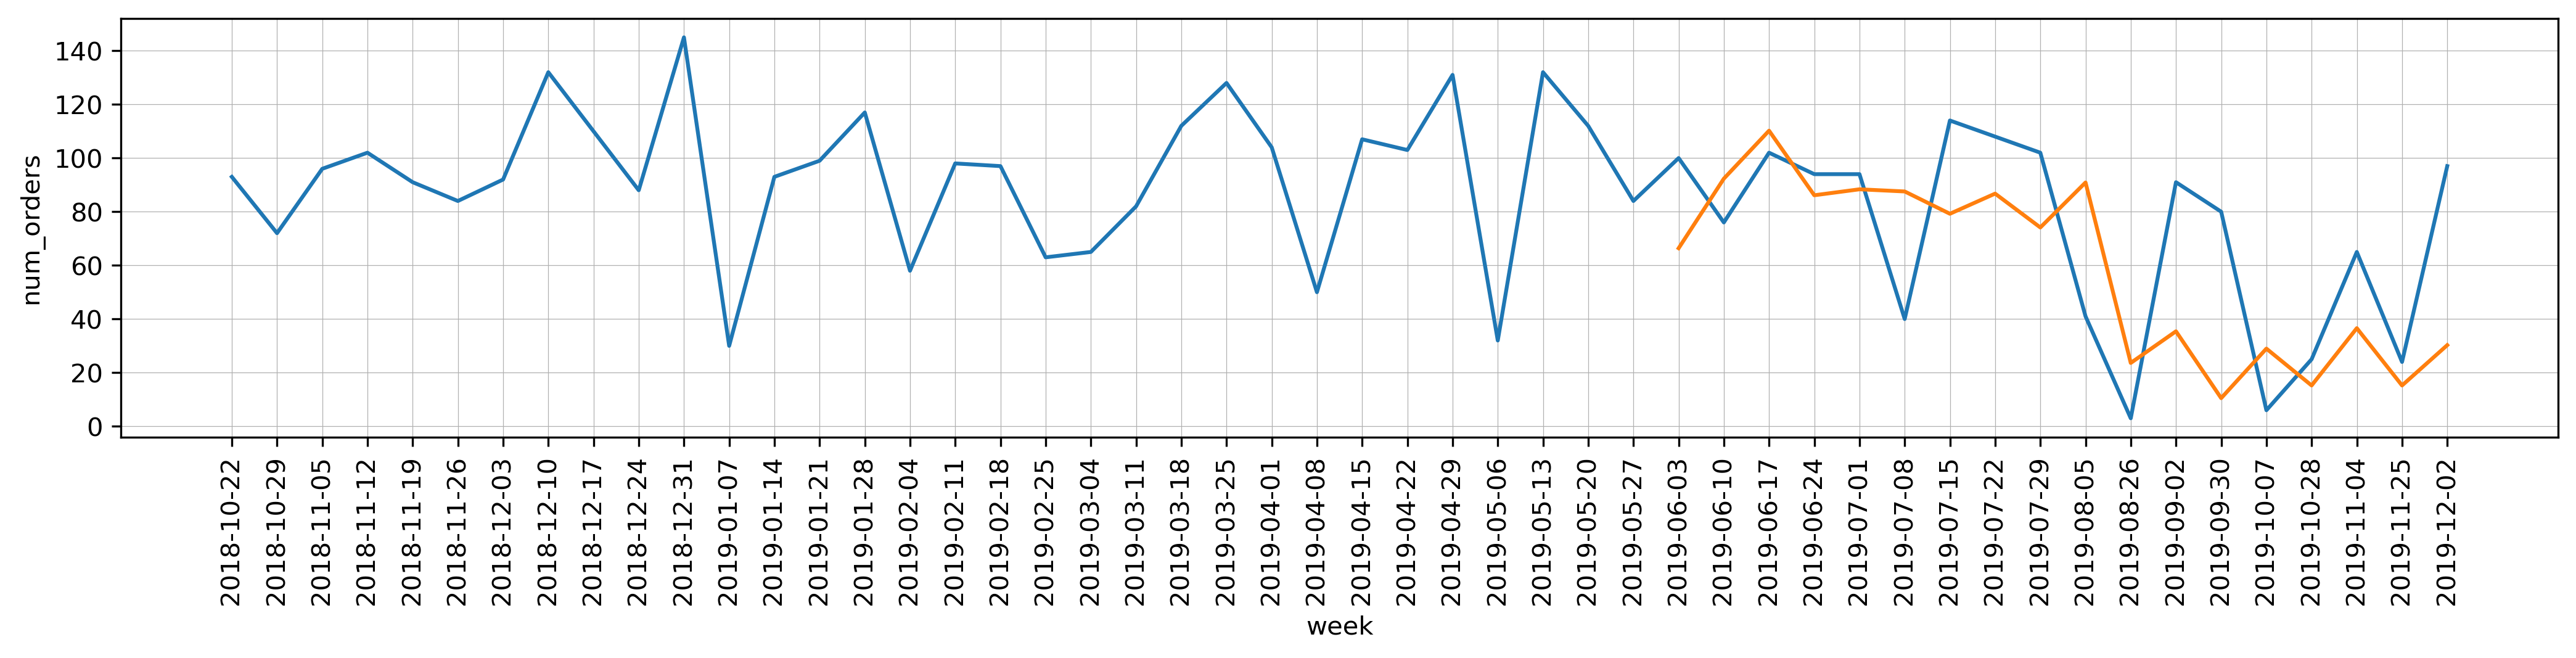

In [78]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi': 300})
fig, ax = plt.subplots()
sns.lineplot(data=weekly_orders.tail(50), x='week', y='num_orders')
sns.lineplot(data=test_df, x='week', y='predictions')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [71]:
!pip install graphviz

In [73]:
import os
os.environ['PATH'] += os.pathsep + 'D:/Graphviz/bin/'

<AxesSubplot:>

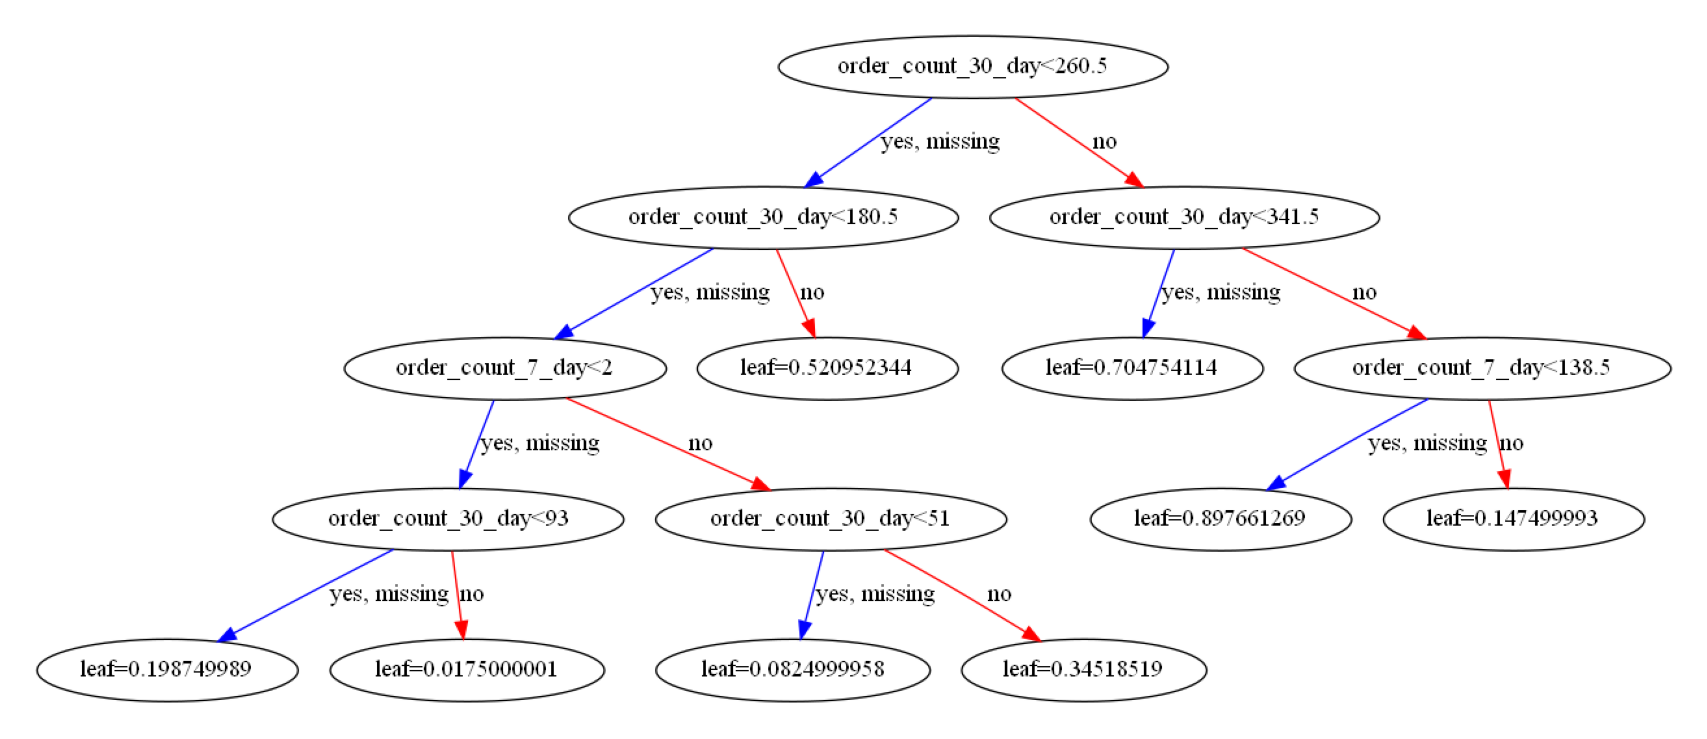

In [79]:
from xgboost import plot_tree
plot_tree(xg_reg)